In [1]:
import re
from tqdm import tqdm

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import (WordCloud, get_single_color_func)
from matplotlib.pyplot import figure

In [3]:
class SimpleGroupedColorFunc(object):
    """Create a color function object which assigns EXACT colors
       to certain words based on the color to words mapping

       Parameters
       ----------
       color_to_words : dict(str -> list(str))
         A dictionary that maps a color to the list of words.

       default_color : str
         Color that will be assigned to a word that's not a member
         of any value from color_to_words.
    """

    def __init__(self, color_to_words, default_color):
        self.word_to_color = {word: color
                              for (color, words) in color_to_words.items()
                              for word in words}

        self.default_color = default_color

    def __call__(self, word, **kwargs):
        return self.word_to_color.get(word, self.default_color)


class GroupedColorFunc(object):
    """Create a color function object which assigns DIFFERENT SHADES of
       specified colors to certain words based on the color to words mapping.

       Uses wordcloud.get_single_color_func

       Parameters
       ----------
       color_to_words : dict(str -> list(str))
         A dictionary that maps a color to the list of words.

       default_color : str
         Color that will be assigned to a word that's not a member
         of any value from color_to_words.
    """

    def __init__(self, color_to_words, default_color):
        self.color_func_to_words = [
            (get_single_color_func(color), set(words))
            for (color, words) in color_to_words.items()]

        self.default_color_func = get_single_color_func(default_color)

    def get_color_func(self, word):
        """Returns a single_color_func associated with the word"""
        try:
            color_func = next(
                color_func for (color_func, words) in self.color_func_to_words
                if word in words)
        except StopIteration:
            color_func = self.default_color_func

        return color_func

    def __call__(self, word, **kwargs):
        return self.get_color_func(word)(word, **kwargs)

In [4]:
def DrawPointColoredWC(tags,title,cwd,topic, drop_list=[], color = '#00ff00', pointed_list=[]):
    color_to_words = {
        color : pointed_list
    }

    use_tags = tags.drop(drop_list, errors = 'ignore')
    wc = WordCloud(font_path='C:/Windows/Fonts/malgun',background_color="white",width=1600, height=800,random_state = 1)

    default_color = 'black'
    grouped_color_func = GroupedColorFunc(color_to_words, default_color)

    cloud = wc.generate_from_frequencies(dict(use_tags))
    wc.recolor(color_func=grouped_color_func)

    figure(dpi=1200)
    figure(figsize=[12,8])
    plt.axis("off")
    plt.imshow(wc, interpolation="bilinear")
    plt.savefig(cwd + '/' + topic + '/'+ title + ' 강조'+'.pdf')
    plt.show()

In [85]:
def DrawWC(tags,title,cwd,topic, drop_list=[], pointed_list=[]):
    use_tags = tags.drop(drop_list,errors = 'ignore')
    wc = WordCloud(font_path='C:/Windows/Fonts/malgun',background_color="white",width=1600, height=800)
    cloud = wc.generate_from_frequencies(dict(use_tags))
    figure(dpi=1200)
    figure(figsize=[12,8])
    plt.axis("off")
    plt.imshow(wc, interpolation="bilinear")
    plt.savefig(cwd + '/' + topic + '/'+ title + '.pdf')
    plt.show()

In [263]:
cwd = os.getcwd()

from_date = '20020101'
to_date = '20230430'
topic = '(농업 OR 농촌) AND 기후위기'

path = cwd +'/' + topic + '/raw'
df_cnt_crisis = pd.read_csv(cwd +'/' + topic + '/'+ 'Monthly_Count_Keyword {}-{}.csv'.format(from_date,to_date),index_col = 'keyword')

In [7]:
# 연도별로 재집적

In [264]:
df_cnt_crisis.columns = [x + '01' for x in list(df_cnt_crisis)]
df_cnt_crisis.columns  = pd.to_datetime(list(df_cnt_crisis))
df_cnt_crisis = df_cnt_crisis.T.resample('Y').sum().T

In [265]:
# 2023년은 값 보정 3배 곱해줌
df_cnt_crisis.iloc[:,-1] = df_cnt_crisis.iloc[:,-1] * 3

In [10]:
df_cnt_crisis['tot_cnt']  = df_cnt_crisis.sum(axis = 1)

In [91]:
title = '최대빈도순'
tags = df_cnt_crisis.sort_values(by = 'tot_cnt', ascending = False)[0:100]['tot_cnt']

<Figure size 7680x5760 with 0 Axes>

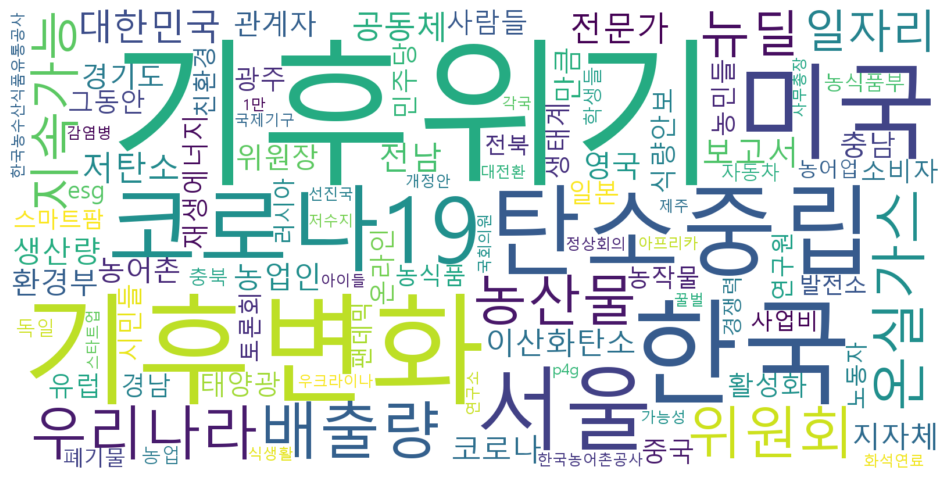

In [93]:
DrawWC(tags = tags, title =title,cwd = cwd,topic = topic,drop_list = ['윤석열','이재명','더불어민주당'])

In [ ]:
from collections import Counter

In [ ]:
# 탄소중립, 감염병, 가뭄

In [141]:
topic = '(농업 OR 농촌) AND 기후위기'
path = cwd +'/' + topic + '/raw'
file_list = os.listdir(path)

dfs = []
for i in file_list:
    df = pd.read_excel(path+'/'+i)
    dfs.append(df)
    print(i)
data = pd.concat(dfs)
print("총 기사 건 수 : " + str(len(data)))  

C:\Users\NH\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning:

Workbook contains no default style, apply openpyxl's default



NewsResult_20020101-20230430.xlsx
총 기사 건 수 : 2677


In [144]:
df3 = pd.DataFrame(Counter([str(x)[0:4] for x in data['일자']]), index = ['count']).T[::-1].reset_index()
df3['topic'] = ['기후위기' for x in range(len(df3))] 
df3['count'][11] =  df3['count'][11]*3

In [179]:
topic = '(농업 OR 농촌) AND 기후변화'
path = cwd +'/' + topic + '/raw'
file_list = os.listdir(path)

dfs = []
for i in file_list:
    df = pd.read_excel(path+'/'+i)
    dfs.append(df)
    print(i)
data = pd.concat(dfs)
print("총 기사 건 수 : " + str(len(data)))  

C:\Users\NH\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning:

Workbook contains no default style, apply openpyxl's default



NewsResult_20020101-20211231.xlsx
NewsResult_20220101-20230430.xlsx
총 기사 건 수 : 20904


In [187]:
df4 = pd.DataFrame(Counter([str(x)[0:4] for x in data['일자']]), index = ['count']).T[::-1].reset_index()
df4['topic'] = ['기후변화' for x in range(len(df4))] 
df4['count'][1] =  df4['count'][1]*3

C:\Users\NH\AppData\Local\Temp\ipykernel_17152\1188409338.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [188]:
df5 = pd.concat([df3,df4])
df5 = df5.sort_values(by = 'index')

In [213]:
import plotly.io as pio
import plotly.express as px

fig = px.line(
     df5, x="index", y='count', color='topic',  symbol='topic', title="기후변화 VS 기후위기 등장빈도 시계열추이".format(topic),
    labels={"index":"년도","count":"빈도"}
)
fig.show()

In [207]:
df6 = df5[df5['topic'] == '기후위기']

In [211]:
fig = px.line(
     df6, x="index", y='count', color='topic',  symbol='topic', title="'기후위기' 키워드 등장빈도의 시계열추이  ".format(topic),
    labels={"index":"년도","count":"빈도"}
)
fig.show()

In [217]:
df7 = df5[df5['index'] == '2019']

In [225]:
import plotly.express as px

fig = px.pie(df7, values='count', names='topic',title='2019년 기후위기와 기후변화 등장빈도 비중')

fig.update_traces(hole=.3)
fig.show()

In [237]:
df7 = df5[df5['index'] == '2020']
fig = px.pie(df7, values='count', names='topic',title='2020년 기후위기와 기후변화 등장빈도 비중')
fig.update_traces(hole=.3)
fig.show()

In [238]:
df7 = df5[df5['index'] == '2021']

In [239]:
fig = px.pie(df7, values='count', names='topic',title='2021년 기후위기와 기후변화 등장빈도 비중')
fig.update_traces(hole=.3)
fig.show()

In [ ]:
# 시도시각화

In [326]:
from_date = '20020101'
to_date = '20230430'
topic = '(농업 OR 농촌) AND 기후위기'

cwd = os.getcwd()
path = cwd +'/' + topic + '/raw'
file_list = os.listdir(path)

dfs = []
for i in file_list:
    df = pd.read_excel(path+'/'+i)
    dfs.append(df)
    print(i)
data = pd.concat(dfs)

C:\Users\NH\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning:

Workbook contains no default style, apply openpyxl's default



NewsResult_20020101-20230430.xlsx


In [327]:
data = data.sort_values(by = '일자')

df = data[['일자','키워드']]
df.reset_index(inplace = True, drop = True)

In [329]:
# 1 행정구역
import geopandas as gpd

F1 = cwd +'/' + topic  + '/CTPRVN_202302/ctp_rvn.shp' 
D1 = gpd.read_file(F1, encoding='cp949')

F2 = cwd +'/' + topic  + '/SIG_202302/sig.shp' 
D2 = gpd.read_file(F2, encoding='cp949')

D1 = D1[['CTPRVN_CD','CTP_KOR_NM']]
D2 = D2[['SIG_CD','SIG_KOR_NM']]

# 시군구 달기
D2['SIG_KOR_NM_SINGLE'] = [x[:-1] for x in D2['SIG_KOR_NM']]
tmp = []
for i in D2['SIG_KOR_NM_SINGLE']:
    if len(i) > 3:
        i = i[0:2]
        tmp.append(i)
    else:
        tmp.append(i)
D2['SIG_KOR_NM_SINGLE'] = tmp

regions = []

for j in tqdm(df['키워드']):
    for i in j.split(','):
        check = 0
        if i in list(D2['SIG_KOR_NM']) :
            check = 1
            regions.append(i)
            break
        elif i in list(D2['SIG_KOR_NM_SINGLE']) :
            check = 1
            regions.append(i)
            break
    if check == 0:
        regions.append('nan')
        
# 시도 달기
D1['CTP_KOR_NM_SINGLE'] = [x[0:2] for x in D1['CTP_KOR_NM']]
D1['CTP_KOR_NM_SINGLE'][10] = '충북'
D1['CTP_KOR_NM_SINGLE'][11] = '충남'
D1['CTP_KOR_NM_SINGLE'][12] = '전북'
D1['CTP_KOR_NM_SINGLE'][13] = '전남'
D1['CTP_KOR_NM_SINGLE'][14] = '경북'
D1['CTP_KOR_NM_SINGLE'][14] = '경남'

provines = []

for j in tqdm(df['키워드']):
    for i in j.split(','):
        check = 0
        if i in list(D1['CTP_KOR_NM_SINGLE']) :
            check = 1
            provines.append(i)
            break
    if check == 0:
        provines.append('nan')
        
        
# 병합
df['시도'] = provines
df['시군구'] = regions

# 시군구 코드 달기
codes = []
new_regions = []
for i in df['시군구']:
    try:
        code = D2[(D2['SIG_KOR_NM_SINGLE'] == i) | (D2['SIG_KOR_NM'] == i)]['SIG_CD'].values[0]
        region = D2[(D2['SIG_KOR_NM_SINGLE'] == i) | (D2['SIG_KOR_NM'] == i)]['SIG_KOR_NM'].values[0]
        codes.append(code)
        new_regions.append(region)
    except:
        codes.append('nan')
        new_regions.append('nan')
        
df['code'] = codes
# 용어 통일
df['시군구'] = new_regions

# 결측치 제거
df = df[(df['시도'] != 'nan') | (df['시군구'] != 'nan') | (df['code'] != 'nan')]
df.reset_index(drop = True, inplace= True)

# 시군구 코드에서 시도코드 파싱
df['code_provine'] = [x[0:2] for x in df['code']]

code_provine_dict = dict(zip(D1['CTPRVN_CD'], D1['CTP_KOR_NM']))

provinesingle_provine = dict(zip(D1['CTP_KOR_NM_SINGLE'], D1['CTP_KOR_NM']))

for i,j in enumerate(df['시도']):
    if j != 'nan':
        df['시도'][i] = provinesingle_provine[j]
        
provine_code_dict =  dict(zip(D1['CTP_KOR_NM'], D1['CTPRVN_CD']))

for i, j in enumerate(df['code_provine']):
    if j == 'na':
        df['code_provine'][i] = provine_code_dict[df['시도'][i]]
        
# 시도코드로 시도추정
provines_est = []
for i in df['code_provine']:
    try:
        provines_est.append(code_provine_dict[i])
    except:
        provines_est.append('nan')
        
df['시도'] = provines_est

100%|████████████████████████████████████████████████████████████████████████████| 2273/2273 [00:01<00:00, 1185.68it/s]
C:\Users\NH\AppData\Local\Temp\ipykernel_17152\1047172851.py:96: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\NH\AppData\Local\Temp\ipykernel_17152\1047172851.py:102: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [359]:
# 지역별, 연도별 뉴스카운트
df['일자'] = [str(x)[0:4] for x in df['일자']]
df_agg = df.groupby(['시도','일자']).size().reset_index()
df_agg = df_agg.rename({0:'count','시도':'CTP_KOR_NM'},axis = 1)

In [ ]:
# 시도시각화

In [ ]:
plt.rcParams['figure.figsize']=(10,5)
F1 = cwd +'/' + topic  + '/CTPRVN_202302/ctp_rvn.shp' 
F1 = gpd.read_file(F1, encoding='cp949')

<AxesSubplot:>

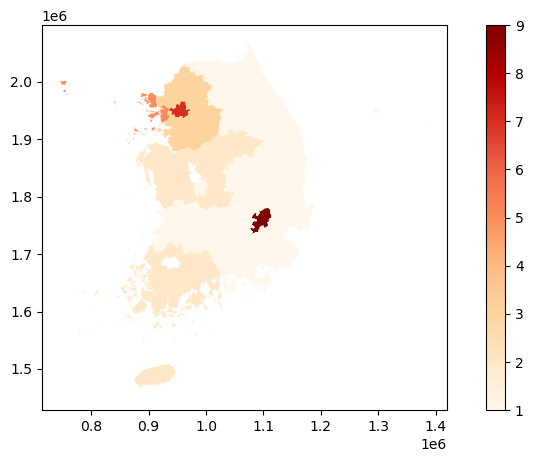

In [413]:
year = '2019'
df_agg_year = df_agg[df_agg['일자']== year]
df_plot = pd.merge(F1,df_agg_year[['CTP_KOR_NM','count']])
df_plot.plot(column="count",cmap="OrRd",legend=True)

<AxesSubplot:>

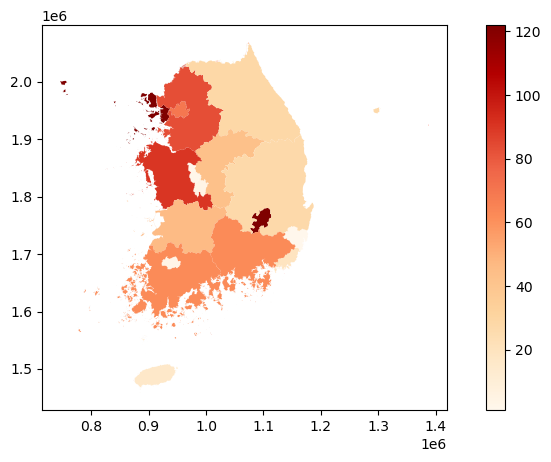

In [405]:
year = '2021'
df_agg_year = df_agg[df_agg['일자']== year]
df_plot = pd.merge(F1,df_agg_year[['CTP_KOR_NM','count']])
df_plot.plot(column="count",cmap="OrRd",legend=True)

C:\Users\NH\AppData\Local\Temp\ipykernel_17152\4101968058.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot:>

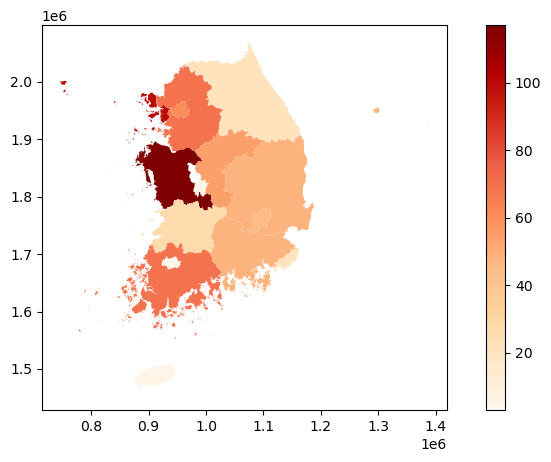

In [414]:
year = '2023'
df_agg_year = df_agg[df_agg['일자']== year]
df_agg_year['count'] = df_agg_year['count']*3 
df_plot = pd.merge(F1,df_agg_year[['CTP_KOR_NM','count']])
df_plot.plot(column="count",cmap="OrRd",legend=True)